# Práctica 7
**Nombre:** Verduzco Lozano Iván Antonio
**Grupo:** 5AM1

---

## Especificaciones
1. Cargar el dataset heart
2. Mezclar los datos con random_state = 0
3. Crear un conjunto de entrenamiento con el 70% y el conjunto de prueba con el 30% restante
4. Con el conjunto de entrenamiento encuentra $\overrightarrow{c_+}, \overrightarrow{c_-}, \overrightarrow{c}$ y $||\overrightarrow{c}||$
5. Predice las clases del conjunto de prueba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# leemos el dataset
data = pd.read_csv('heart.csv', sep=',', engine='python')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# obtenemos las columnas 
X = data[data.columns[0:13].values]
y = data['target']

# Obtenemos datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

In [4]:
def dividir_dataset(X_train, y_train):

    index_pos = []
    index_neg = []

    for i, value in enumerate(y_train):
        if value == 1:
            index_pos.append(i)
        else:
            index_neg.append(i)
    
    X_pos = X_train.iloc[index_pos]
    X_neg = X_train.iloc[index_neg]

    return X_pos, X_neg

In [5]:
# Obtener los valores clasificados
X_pos, X_neg = dividir_dataset(X_train, y_train)

In [6]:
def obtener_vect_promedio(X):
    vect_p = []
    n = X.shape[0]

    for i, value in enumerate(X):
        suma = X[value].sum()
        # Sacamos promedio
        vect_p.append(suma/n)
    
    return vect_p

In [7]:
prom_x_pos = obtener_vect_promedio(X_pos)
prom_x_neg = obtener_vect_promedio(X_neg)

In [8]:
def obtener_c(prom_x_pos, prom_x_neg):
    vect_c = []

    for i, value in enumerate(prom_x_pos):
        c_i = (value + prom_x_neg[i])/2
        vect_c.append(c_i)

    # Retornamos el vector c y su norma
    return vect_c, np.linalg.norm(vect_c)

In [9]:
c, norm_c = obtener_c(prom_x_pos, prom_x_neg)

In [10]:
def clasificar_valor(X_test, c, norm_c):
    y_predict = []
    n = X_test.shape[0]

    for i in np.arange(0,n):
        proy = (np.dot(X_test.iloc[i], c)/norm_c)
        if proy > norm_c:
            y_predict.append(1)
        else:
            y_predict.append(0)

    return y_predict

In [11]:
y_predict = clasificar_valor(X_test, c, norm_c)
print (accuracy_score(y_test, y_predict))

0.4835164835164835


              precision    recall  f1-score   support

           1       0.47      0.57      0.52        44
           0       0.50      0.40      0.45        47

    accuracy                           0.48        91
   macro avg       0.49      0.49      0.48        91
weighted avg       0.49      0.48      0.48        91

[[19 28]
 [19 25]]


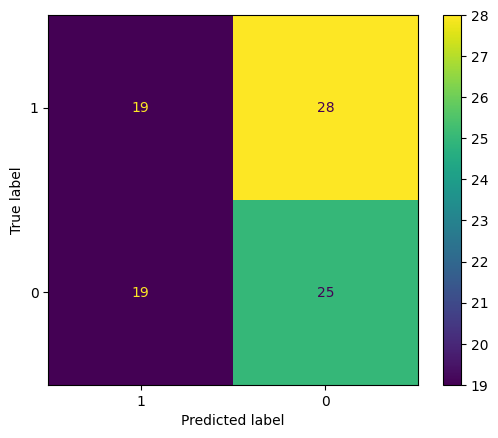

In [12]:
target_names = list(map(str, [1, 0]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[1, 0])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4f84915-2855-44c0-8669-9ff1fa8acda9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>